In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read in data in suicide-rates.csv

suicide_df = pd.read_csv('suicide-rates.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
is_u = suicide_df['country'].apply(lambda x: x[0] == 'U')

In [5]:
u_countries_df = suicide_df[is_u]

In [6]:
u_countries_df['country'].unique()

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

In [7]:
is_usa = u_countries_df['country'] == 'United States'
usa_df = u_countries_df[is_usa]
usa_df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [9]:
#usa_df.groupby('age').agg({'suicides_no': 'sum'})

,suicides_no
age,
15-24 years,141679
25-34 years,182047
35-54 years,380917
5-14 years,8923
55-74 years,224770
75+ years,95677


In [10]:
#usa_df_copy = usa_df.copy()
#usa_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null object
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [37]:
usa_df['age'] = usa_df['age'].astype('category')
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null category
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 35.4+ KB


/Users/bar/dev/miniconda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
a = list(usa_df['age'].cat.categories)
a[3]='0'+a[3]
a = sorted(a)
a

a[0] = a[0].strip('0')
a

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [42]:
usa_df['age'] = usa_df['age'].cat.reorder_categories(a)


usa_df['age'].cat.categories

/Users/bar/dev/miniconda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [44]:
usa_df_copy = usa_df.groupby('age')['suicides_no'].agg('sum')
usa_df_copy


age
5-14 years       8923
15-24 years    141679
25-34 years    182047
35-54 years    380917
55-74 years    224770
75+ years       95677
Name: suicides_no, dtype: int64

In [45]:
usa_df_copy.head()

age
5-14 years       8923
15-24 years    141679
25-34 years    182047
35-54 years    380917
55-74 years    224770
Name: suicides_no, dtype: int64

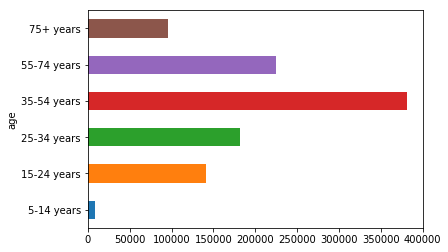

In [48]:
usa_df_copy.plot(kind='barh')
